## 2 Selection sort

Este algoritmo resuelve el problema de ordenación. Busca dentro del arreglo el elemento más pequeño y lo coloca al inicio del arreglo, luego recorta el primer elemento del arreglo. Repite este proceso hasta que solo quede un elemento en el arreglo.

### 2.1 Algoritmo

In [6]:
def selectionSort (A, p, n):
    if p < n:
        min = p
        for i in range (p, n):
            if A[i] < A[min]:
                min = i
        A[p], A[min] = A[min], A[p]
        selectionSort(A, p+1, n)
        return A

### 2.2 Verificación

In [7]:
A=[15,64,23,8,39,21,48,56]

In [8]:
A=selectionSort(A, 0, len(A))
print(A)

[8, 15, 21, 23, 39, 48, 56, 64]


**Loop invariante:** En la i-ésima iteración están ordenados los primeros $i-1$ elementos y el resto de elementos son mayores a todos los $i$ elementos ordenados.  
**Inicilización:** En la primera iteración se elige el mínimo y se coloca al principio del arreglo, lo que cumple el loop invariante.  
**Mantenimiento:** En la i-ésima iteración como los primeros $i-1$ elementos están ordenados, al poner el mínimo de los elementos no ordenados al principo de éstos, se garantiza que ahora los primeros $i$ elementos estarán ordenados.  
**Finalización:**  El algoritmo termina cuando $i=n$ y se ordena el n-ésimo elemento. Todos los elementos están ordenados, por lo tanto es correcto el algoritmo

### 2.3 Análisis del tiempo de ejecución

Analizando línea por línea: Las líneas 1 y 2 se ejecutan $\theta(1)$ veces. Las líneas 3, 4 y 5 al estar en un ciclo for se ejecutan $\theta(n)$ veces. La línea 6 se ejecuta $\theta(1)$ veces. La línea 7 tiene tiempo de ejecición $T(n-1)$ ya que se llama a la misma función pero el arreglo tiene un elemento menos.  Y por  último, la línea 8 ejecuta $\theta(1)$ veces.  
Al sumar, el tiempo de ejecución de todas las líneas, el tiempo de ejecición del algoritmo quedaría de la siguiente forma: $T(n)=T(n-1)+\theta(n^2)+\theta(1)$.  
Luego de resolver la recursión se llega a lo siguiente: $T(n)=\theta(n^2)$

### 2.4 Experimentación en el tiempo de ejecución

Vamos a realizar 16 ejecuciones del algoritmo para entradas A de tamaño 100*i con entradas aleatorias con $i\in\{1,\dots,16\}$. Luego tomaremos el timempo que tarda el algoritmo con cada arreglo.

In [9]:
from random import randint
from timeit import default_timer

A=[]
for i in range (16):
    for j in range(100):
        A.append(randint(0,200))
    inicio = default_timer()
    A = selectionSort(A, 0, len(A))
    fin = default_timer()
    print(str(len(A)) + ' elementos: ' + str(fin-inicio))

100 elementos: 0.0007317000126931816
200 elementos: 0.002510699996491894
300 elementos: 0.004627199989045039
400 elementos: 0.009407700010342523
500 elementos: 0.008855899999616668
600 elementos: 0.011428300000261515
700 elementos: 0.013503499998478219
800 elementos: 0.01755990000674501
900 elementos: 0.02182840000023134
1000 elementos: 0.028540500003146008
1100 elementos: 0.03370979998726398
1200 elementos: 0.04010380001273006
1300 elementos: 0.04801090000546537
1400 elementos: 0.053535800019744784
1500 elementos: 0.06270139999105595
1600 elementos: 0.07539290000568144


A continuación, graficaremos los puntos $(n,time)$ donde $n$ corresponde al tamaño del arreglo y para fines prácticos, redondearemos los tiempos. 

Text(0, 0.5, 'segundos')

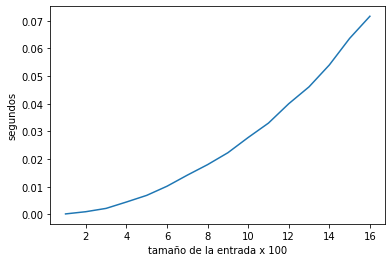

In [92]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y=[0.0002,0.001,0.0022,0.0045,0.0069,0.0102,0.0142,0.018,0.0223,0.0278,0.033,0.04,0.0461,0.054,0.0636,0.0716]

plt.plot(x, y)
plt.xlabel('tamaño de la entrada x 100')
plt.ylabel('segundos')

Ahora ajustaremos una curva cuadrática vía mínimos cuadrados (en naranja) y la dibujaremos encima de la curva azul.

Text(0, 0.5, 'segundos')

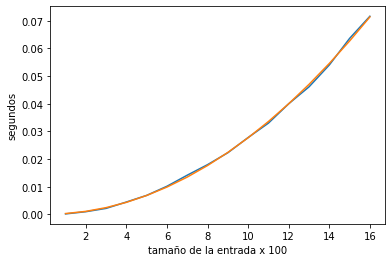

In [116]:
import numpy as np

M = np.zeros((17,7))
suma = 0
for k in range(4):
    suma = 0
    for i in range(16):
        M[i,k] = x[i]**(k+1)
        suma += M[i,k]
    M[16,k] = suma

for k in range(3):
    suma = 0
    for i in range(16):
        M[i,4+k] = y[i]*(x[i]**k)
        suma += M[i,4+k]
    M[16,4+k] = suma

MatrizDeCoeficientes = np.zeros((3,3))
for i in range (3):
    for j in range (3):
        if i+j>0:
            MatrizDeCoeficientes[i,j] = M[16,i+j-1]
        else:
            MatrizDeCoeficientes[i,j] = 16

MatrizDeResultados = np.zeros((3,1))
for i in range(3):
    MatrizDeResultados[i,0]=M[16,4+i]

coeficientes = np.dot(np.linalg.inv(MatrizDeCoeficientes), MatrizDeResultados)

def f(x):
    return coeficientes[0] + coeficientes[1]*x + coeficientes[2]*x*x
plt.plot(x, y)
plt.plot(x, f(x))
plt.xlabel('tamaño de la entrada x 100')
plt.ylabel('segundos')